# An Evaluation of The NBA MVP Award Selection Process 
# By Zirui Li 


# Purpose And Introduction:  
The purpose of this project is to evaluate the NBA award selection criterions using the data science life cycle. The NBA is short for the National Basketball Association which is the highest level of professional basketball league in America. For each NBA season, an MVP(Most Valuable Player) award is given to one single player in the league for their outstanding performance in the regular season. But what criterions are being looked at for this award selection? Is it points per game, assists per game, winning percentage, or postseason success? The purpose of this evaluation is to determine what factors of a certain player contribute the most to their MVP selection chances, and how those factors have changed over time.  Through this evaluation, it would help us predict the MVP for the next upcoming season. 

To be clear about what I am trying to evaluate, the mvp shares variable for each candidate determines whether or not the candidate will win mvp. And that variable is calculated by doing (total points won)/(total points). I will be evaluating which features of a certain player affect their chances of getting a high mvp share percentage. The player with the highest mvp share percentage for that given season will be awarded MVP for that season. The total points won is determined by voting from sportswriters, journalists, and broadcasters. The value will be a continuous variable, and I will be using linear regression, k-nearest neighbor, and a decision tree for the machine learning part.



In [136]:
# Part 1 - Data Collection
%pip install lxml
%pip install html5lib

# necessary imports for the data collection and processing part of this project
import time
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.patches as mpatches








Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Collection
In this part of the project, I will be scraping data from the https://www.basketball-reference.com/ website. I will be preparing two sets of data. One of them will simply be all the MVPS from the 1955-1956 season until the 2022-2023 season. Another set of data that I will prepare for will be the top 8 candidates for MVP from the 1991-1992 season all the way to the 2020-2021, which is 30 years. I will be utilizing both of these data sets to explore the features of a player that contribute to their chances of winning MVP.

In [137]:
years = list(range(1991, 2021))
print(years, end=" ")

# url used to obtain the mvps from the 1955-1956 all the way to the 2022-23 season
award_url = (f'https://www.basketball-reference.com/awards/mvp.html')

# url used to get the top 8 mvp candidates from each year from 1991 to 2021
year_url = "https://www.basketball-reference.com/awards/awards_{}.html" 


# The requests library can send a GET request to award_url
mvps = requests.get(award_url)



[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

In [138]:

# BeautifulSoup library parses the content of an HTML document, in this case wiz_res
mvp_soup = BeautifulSoup(mvps.content, 'lxml')


# finds the table in the webpage with id mvp_NBA, the table contains all nba mvps from 1955-2023
mvp_per_game = mvp_soup.find(name = 'table',id = 'mvp_NBA')







In [139]:
# Obtains all the NBA MVPS from the 2022-2023 NBA season to the 1955-1956 NBA season
# Creating a list of dictionaries to then convert into a Pandas Dataframe
mvp_stats = []

year = 2023
for row in mvp_per_game.find_all('tr')[2:]:  # Excluding the first 'tr', since that's the table's title head

    player = {}
    player['Name'] =row.find('td', {'data-stat' : 'player'}).text
    player['Age'] = row.find('td', {'data-stat' : 'age'}).text
    player['Min_per_game'] = row.find('td', {'data-stat' : 'mp_per_g'}).text
    player['Field Goal %'] = row.find('td', {'data-stat' : 'fg_pct'}).text
    player['Rebounds_per_game'] = row.find('td', {'data-stat' : 'trb_per_g'}).text
    player['Assists_per_game'] = row.find('td', {'data-stat' : 'ast_per_g'}).text
    player['Steals_per_game'] = row.find('td', {'data-stat' : 'stl_per_g'}).text
    player['Blocks_per_game'] = row.find('td', {'data-stat' : 'blk_per_g'}).text
    player['Points_per_game'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
    player['Win_Shares'] = row.find('td', {'data-stat' : 'ws'}).text
    player['year'] = year
    year = year - 1
    mvp_stats.append(player)

data = pd.DataFrame(mvp_stats)
data





,Name,Age,Min_per_game,Field Goal %,Rebounds_per_game,Assists_per_game,Steals_per_game,Blocks_per_game,Points_per_game,Win_Shares,year
0,Joel Embiid,28,34.6,.548,10.2,4.2,1.0,1.7,33.1,12.3,2023
1,Nikola Jokić,26,33.5,.583,13.8,7.9,1.5,0.9,27.1,15.2,2022
2,Nikola Jokić,25,34.6,.566,10.8,8.3,1.3,0.7,26.4,15.6,2021
3,Giannis Antetokounmpo,25,30.4,.553,13.6,5.6,1.0,1.0,29.5,11.1,2020
4,Giannis Antetokounmpo,24,32.8,.578,12.5,5.9,1.3,1.5,27.7,14.4,2019
...,...,...,...,...,...,...,...,...,...,...,...
63,Wilt Chamberlain,23,46.4,.461,27.0,2.3,,,37.6,17.0,1960
64,Bob Pettit,26,39.9,.438,16.4,3.1,,,29.2,14.8,1959
65,Bill Russell,23,38.3,.442,22.7,2.9,,,16.6,11.3,1958
66,Bob Cousy,28,36.9,.378,4.8,7.5,,,20.6,8.8,1957


In [140]:
# saves the data
dataSaved = data



In [160]:
# array used to store the top 8 mvp candidates for each year in the mvp.
top_candidates = []

for year in years:
    # formats the url to get the top candidates from that year
    url = year_url.format(year)
    
    # sends a get request
    data = requests.get(url)
    
    # uses beautiful soup to parse the result and locates the table with id mvp
    mvp_soup = BeautifulSoup(data.content, 'lxml')
    mvp_per_game = mvp_soup.find(name = 'table', id = 'mvp')
    
    
    # for each row in the table, extracts all the relevant features that I want for a player
    # and then appends that player into the final dataframe.
    for row in mvp_per_game.find_all('tr')[2:10]:  # Excluding the first two'tr', since they aren't relevant data

        player = {}
        player['Rank'] =row.find('th', {'data-stat' : 'rank'}).text
        player['Name'] =row.find('td', {'data-stat' : 'player'}).text
        player['points_won'] =row.find('td', {'data-stat' : 'points_won'}).text
        player['points_max'] =row.find('td', {'data-stat' : 'points_max'}).text
        player['Age'] = row.find('td', {'data-stat' : 'age'}).text
        player['Min_per_game'] = row.find('td', {'data-stat' : 'mp_per_g'}).text
        player['Field Goal %'] = row.find('td', {'data-stat' : 'fg_pct'}).text
        player['Rebounds_per_game'] = row.find('td', {'data-stat' : 'trb_per_g'}).text
        player['Assists_per_game'] = row.find('td', {'data-stat' : 'ast_per_g'}).text
        player['Steals_per_game'] = row.find('td', {'data-stat' : 'stl_per_g'}).text
        player['Blocks_per_game'] = row.find('td', {'data-stat' : 'blk_per_g'}).text
        player['Points_per_game'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
        player['Win_Shares'] = row.find('td', {'data-stat' : 'ws'}).text
        player['year'] = year
        mvp_stats.append(player)

    data = pd.DataFrame(mvp_stats)
    top_candidates.append(data);
    mvp_stats = []
    
    

    

    
    
    
    


In [161]:

saved_top_candidates = top_candidates


In [128]:
# Cleans the data by dropping any rows that has nan as its value
for i in range(len(saved_top_candidates)):
    saved_top_candidates[i] = saved_top_candidates[i].dropna()
    
# does the same for the data that contains all the mvps from 1955 to 2023
data = data.dropna()

In [129]:
# Each element in the array should correspond to a dataframe that contains the top 8 MVP candidates for a specific year
saved_top_candidates[0]

,Rank,Name,points_won,points_max,Age,Min_per_game,Field Goal %,Rebounds_per_game,Assists_per_game,Steals_per_game,Blocks_per_game,Points_per_game,Win_Shares,year,color,mvp_shares
0,1,Michael Jordan,891.0,960.0,27,37.0,0.539,6.0,5.5,2.7,1.0,31.5,20.3,1991,blue,0.928125
1,2,Magic Johnson,497.0,960.0,31,37.1,0.477,7.0,12.5,1.3,0.2,19.4,15.4,1991,gray,0.517708
2,3,David Robinson,476.0,960.0,25,37.7,0.552,13.0,2.5,1.5,3.9,25.6,17.0,1991,gray,0.495833
3,4,Charles Barkley,222.0,960.0,27,37.3,0.570,10.1,4.2,1.6,0.5,27.6,13.4,1991,gray,0.231250
4,5,Karl Malone,142.0,960.0,27,40.3,0.527,11.8,3.3,1.1,1.0,29.0,15.5,1991,gray,0.147917
5,6,Clyde Drexler,75.0,960.0,28,34.8,0.482,6.7,6.0,1.8,0.7,21.5,12.4,1991,gray,0.078125
6,7,Kevin Johnson,32.0,960.0,24,36.0,0.516,3.5,10.1,2.1,0.1,22.2,12.7,1991,gray,0.033333
7,8,Dominique Wilkins,29.0,960.0,31,38.0,0.470,9.0,3.3,1.5,0.8,25.9,11.4,1991,gray,0.030208


# Data Visualization:

To visualize the data more clearly, I want to see what kind of relationships exist between different features, and how they will influence the mvp shares percentage. For example, does a higher field goal percentage for a player necessary lead to a higher mvp shares percentage?. To do this testing, I picked two features, Points per game and win shares. I plotted each of these two features with the mvp shares rate as a scatter plot. I then colored the dots on the scatter plot such as all the gray dots will represent candidates who did not win mvp in their given year, and all the blue dots will represent candidates who did win mvp for their given year. For the win share feature, by looking at the graph I found that generally the candidates who won mvp had a very high win share rate as well. There was therefore a positive relationship between win shares and mvp share percentage. For the points per game feature, I found that it is also true that there exists a positive relationship between mvp share percentage and points per game. However, by looking at the blue dots(candidates who won mvp), I found that their ppg is distributed more heavily toward the 25-30 range. This is still quite good in the NBA, but there were many other candidates whose ppg were above 30 but did win the mvp award. 


Text(0.5, 1.0, 'Win Shares vs MVP Share Percentage')

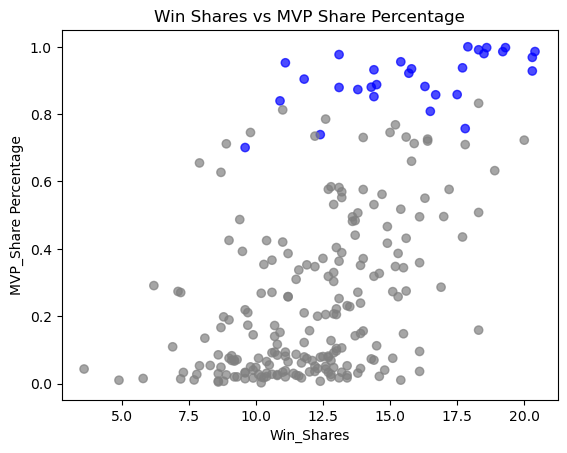

In [130]:
# Exploratory data Analysis

# Plots scatter plot values of different features against win share, blue dot indicates candidates who have
# won the mvp. Gray dots indicate candidates who didn't win.

import numpy as np
import matplotlib.pyplot as plt

# function used for color mapping. 
def pltcolor(lst):
    cols=[]
    for l in lst:
        # If the value of the rank column is one, color the dot in the scatter plot to be blue
        if l=='1':
            cols.append('blue')
        # if the value of the rank column is anything other than one, color the dot to be gray
        else:
            cols.append('gray')
    return cols
# Create the colors list using the function above



# for the dataframe for each year, plots a scatter plot of win share vs mvp share percentage.
# the blue dots indicates those who actually won the mvp award.
for df in saved_top_candidates:
    df['points_won'] = df['points_won'].astype('float')
    df['points_max'] = df['points_max'].astype('float')
    df['Win_Shares'] = df['Win_Shares'].astype('float')
    cols = pltcolor(df['Rank'])
    df['color'] = cols
    plt.scatter(df['Win_Shares'], df['points_won']/df['points_max'], alpha=0.7,c=cols)
 
    
plt.xlabel('Win_Shares')
plt.ylabel('MVP_Share Percentage')
plt.title('Win Shares vs MVP Share Percentage')

    
    
    


Text(0.5, 1.0, 'Points Per Game vs MVP Share Percentage')

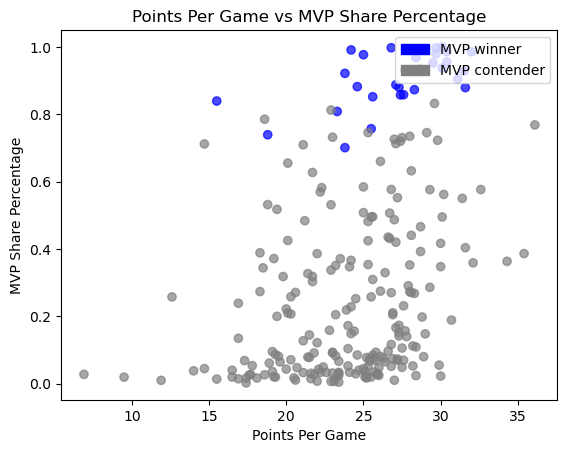

In [131]:
# Now do the same thing for a different variable, this time points per game.

# for the dataframe for each year, plots a scatter plot of win share vs points per game.
# the blue dots indicates those who actually won the mvp award.
for df in saved_top_candidates:
    df['points_won'] = df['points_won'].astype('float')
    df['points_max'] = df['points_max'].astype('float')
    df['Points_per_game'] = df['Points_per_game'].astype('float')
    df['year'] = df['year'].astype('int');
    cols = pltcolor(df['Rank'])
    plt.scatter(df['Points_per_game'], df['points_won']/df['points_max'], alpha=0.7,c=cols)
    

    
blue_patch = mpatches.Patch(color='blue', label='MVP winner')
gray_patch = mpatches.Patch(color='gray', label='MVP contender')
plt.legend(handles=[blue_patch, gray_patch],loc='upper right')
    
plt.xlabel('Points Per Game')
plt.ylabel('MVP Share Percentage')
plt.title('Points Per Game vs MVP Share Percentage')

When plotting a scatter plot of rebounds per game vs mvp share percentage, we see that a wide range of players win the mvp award with different rebound per game values. This is shown by the fact that the blue dots are almost equally distributed horizontally from low rebounds per game to high rebounds per game values. This tells me that when performing linear regression, rebounds per game is probably not a variable that I want to use for the training as it has little correlation with mvp share percentage.

Text(0.5, 1.0, 'Rebounds Per Game vs MVP Share Percentage')

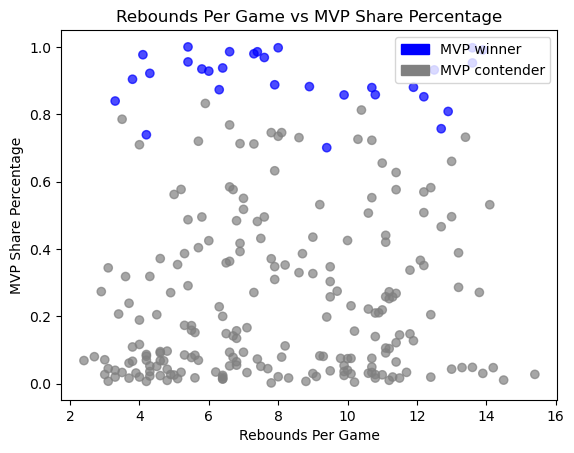

In [132]:
# Now do the same thing for a different variable, this time let it be rebounds per game

# for the dataframe for each year, plots a scatter plot of rebounds per game vs mvp share percentage.
# the blue dots indicates those who actually won the mvp award.
for df in saved_top_candidates:
    df['Rebounds_per_game'] = df['Rebounds_per_game'].astype('float')
    df['points_won'] = df['points_won'].astype('float')
    df['points_max'] = df['points_max'].astype('float')
    cols = pltcolor(df['Rank'])
    plt.scatter(df['Rebounds_per_game'], df['points_won']/df['points_max'], alpha=0.7,c=cols)
    
# creates legends for the graph
blue_patch = mpatches.Patch(color='blue', label='MVP winner')
gray_patch = mpatches.Patch(color='gray', label='MVP contender')
plt.legend(handles=[blue_patch, gray_patch],loc='upper right')

plt.xlabel('Rebounds Per Game')
plt.ylabel('MVP Share Percentage')
plt.title('Rebounds Per Game vs MVP Share Percentage')

Text(0, 0.5, 'Frequency')

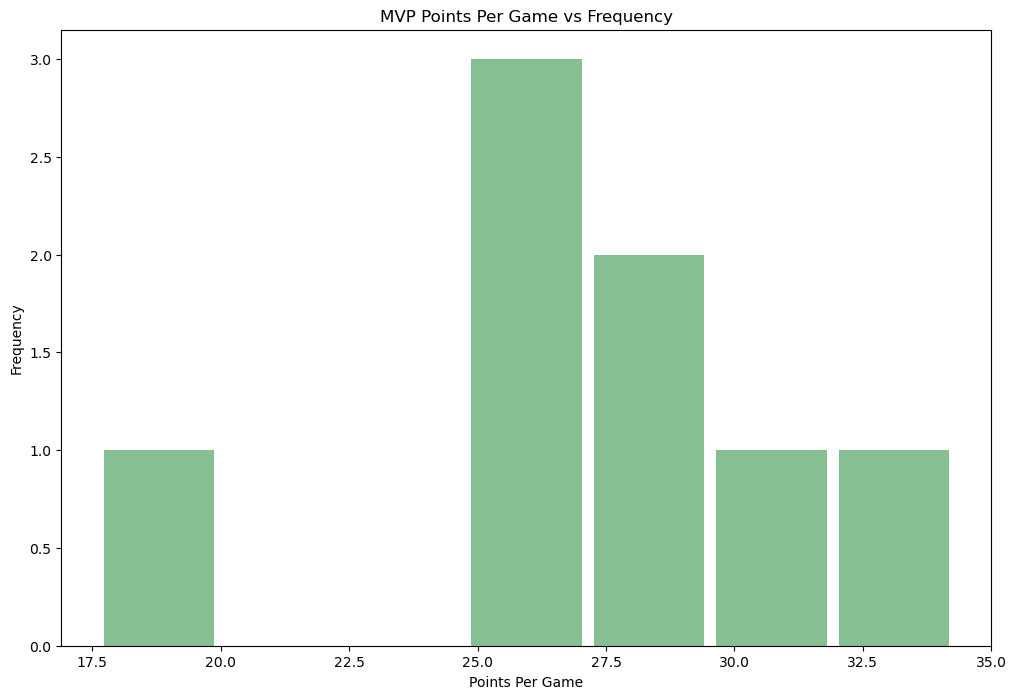

In [133]:
# plots a bar graph of the mvp's points per game, with the y-axis being the frequency
data['Points_per_game'] = data['Points_per_game'].astype(float)

ax =data.hist(column='Points_per_game', bins=7, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

  
# adding labels for the graph
plt.title('MVP Points Per Game vs Frequency')
plt.xlabel('Points Per Game')
plt.ylabel('Frequency')




The graph almost looks like a normal distribution with a mean of 27.5 points per game. Most MVPS average around 27.5 points per game according to the dataset.

Text(0.5, 1.0, 'Field Goal % vs MVP Share Percentage')

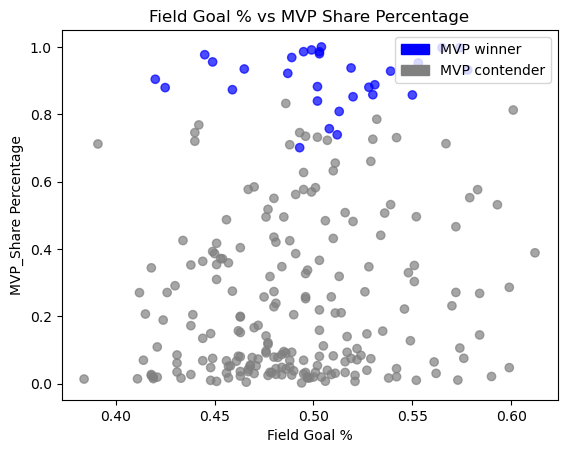

In [134]:
# Now do the same thing for a different variable, this time points per game.

# for the dataframe for each year, plots a scatter plot of mvp share percentage vs points per game.
# the blue dots indicates those who actually won the mvp award.
for df in saved_top_candidates:
    df['Field Goal %'] = df['Field Goal %'].astype('float')
    df['points_max'] = df['points_max'].astype('float')
    df['points_won'] = df['points_won'].astype('float')
    df['mvp_shares'] = df['points_won']/df['points_max']

    plt.scatter(df['Field Goal %'], df['mvp_shares'], alpha=0.7,c=cols)
    
# adding legends, blue dots indicates candidate who did win the mvp and gray dots indicate candidates
# who didn't
blue_patch = mpatches.Patch(color='blue', label='MVP winner')
gray_patch = mpatches.Patch(color='gray', label='MVP contender')
plt.legend(handles=[blue_patch, gray_patch],loc='upper right')
plt.xlabel('Field Goal %')
plt.ylabel('MVP_Share Percentage')
plt.title('Field Goal % vs MVP Share Percentage')




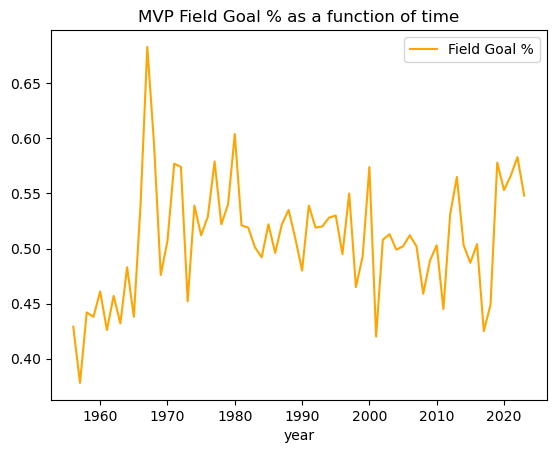

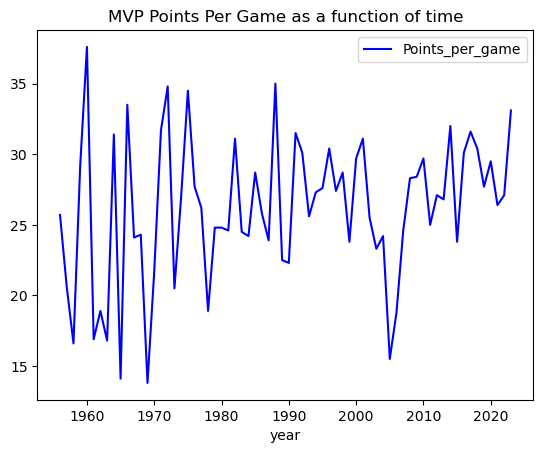

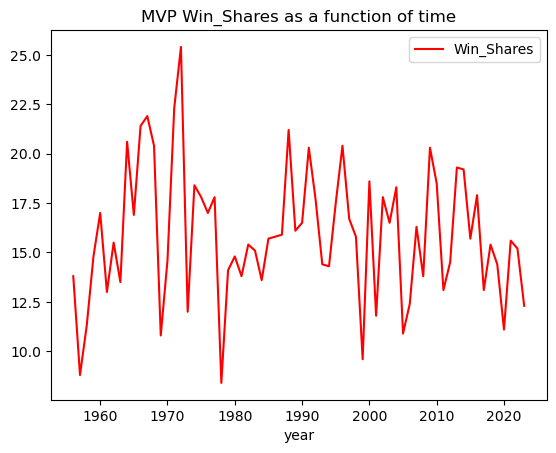

In [142]:
# Plots a line graph of the three variables to look at as a function of time(year), 
# Points Per Game, Field Goal %, and Win Shares. The data will be the data that contains
# the mvps, not the data that contains the top 8 candidates for each year.

dataSaved['Field Goal %'] = dataSaved['Field Goal %'].astype('float')
dataSaved['Points_per_game'] = dataSaved['Points_per_game'].astype('float')
dataSaved['Win_Shares'] = dataSaved['Win_Shares'].astype('float')

# plotting line graph for Field Goal %
lines = dataSaved.plot.line(x='year', y='Field Goal %',color="orange",title="MVP Field Goal % as a function of time")

# plotting line graph for Points Per Game
lines = dataSaved.plot.line(x='year', y='Points_per_game',color="blue", title="MVP Points Per Game as a function of time")

# Plotting line graph for win shares
lines = dataSaved.plot.line(x='year', y='Win_Shares',color="red", title="MVP Win_Shares as a function of time")


After plotting the line graphs, it seems like the NBA’s standard for MVP selection has been relatively stable throughout the years. There’s no specific trend in the line graphs that shows a gradual increase or decrease of any of the variables as time increases. This leads me to believe that these three features would be ideal to use when performing linear regression or implementing a decision tree. 



In [126]:
#modeling imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error


from sklearn.neighbors import KNeighborsRegressor


# Machine Learning(Linear Regression):
Performs linear regression on the dataset. The continuous variable that we are trying to predict is the mvp share percentage. Out of all the candidates for mvp for a given year, the candidate with the highest mvp share percentage will win the mvp award. We can use this fact to test the accuracy of our model. Based on the data visualizations performed above, the three independent variables that I decided to use were field goal percentage, win shares, and points per game. 

# Testing: 
To test the accuracy of the linear regression model, I take the dataset for each year, which contains the top 8 mvp candidates, and sorts them by mvp share percentage, this way the candidate who won the mvp would appear as the first row in the dataset. Then I make a copy of this data, and sorts them by the mvp share percentage that my model predicted. The first row for this dataset will be the predicted mvp for the given year. To check if my prediction is accurate, I just compare the first row of the original dataset to the first row of the copied dataset, if they are the same, then that means I have successfully predicted the mvp for the given year. I do this same process for every year from 1991 to 2021, and check if my model have predicted the correct mvp for each year.


In [153]:


df_final = saved_top_candidates[0]

# merges the arrray of data into a final large dataframe
for i in range(1,len(saved_top_candidates)):
    df_final = df_final.merge(saved_top_candidates[i], how="outer")
    

# sets the type to int
df_final['year'] = df_final['year'].astype('int')
df_final['mvp_share'] = df_final['points_won']/df_final['points_max']


# sets the features which are the independent variables and the dependent variable that we're
# trying to predict, which is the mvp share percentage.
X = df_final[['Points_per_game','Win_Shares','Field Goal %']]
Y = df_final['points_won']/df_final['points_max']


# splits the data with a test size of 0.4
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.4)

model = LinearRegression()
model.fit(x_train, y_train) 
predictions = model.predict(x_test)

# calculates the mean absolute error
mae = mean_absolute_error(predictions, y_test)
print(mae)


df_select = df_final[df_final['year'] >= 2009]
df_select_copy = df_select.copy(deep=True)
df_select['predicted_mvp_share'] = predictions
df_final.tail(30)





0.19878045801889846


/tmp/ipykernel_83/1939389340.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['predicted_mvp_share'] = predictions


,Rank,Name,points_won,points_max,Age,Min_per_game,Field Goal %,Rebounds_per_game,Assists_per_game,Steals_per_game,Blocks_per_game,Points_per_game,Win_Shares,year,color,mvp_shares,mvp_share
210,3,Kawhi Leonard,500.0,1010.0,25,33.4,0.485,5.8,3.5,1.8,0.7,25.5,13.6,2017,gray,0.495050,0.495050
211,4,LeBron James,333.0,1010.0,32,37.8,0.548,8.6,8.7,1.2,0.6,26.4,12.9,2017,gray,0.329703,0.329703
212,5,Isaiah Thomas,81.0,1010.0,27,33.8,0.463,2.7,5.9,0.9,0.2,28.9,12.5,2017,gray,0.080198,0.080198
213,6,Stephen Curry,52.0,1010.0,28,33.4,0.468,4.5,6.6,1.8,0.2,25.3,12.6,2017,gray,0.051485,0.051485
214,7T,Giannis Antetokounmpo,7.0,1010.0,22,35.6,0.521,8.8,5.4,1.6,1.9,22.9,12.4,2017,gray,0.006931,0.006931
215,7T,John Wall,7.0,1010.0,26,36.4,0.451,4.2,10.7,2.0,0.6,23.1,8.8,2017,gray,0.006931,0.006931
216,1,James Harden,965.0,1010.0,28,35.4,0.449,5.4,8.8,1.8,0.7,30.4,15.4,2018,blue,0.955446,0.955446
217,2,LeBron James,738.0,1010.0,33,36.9,0.542,8.6,9.1,1.4,0.9,27.5,14.0,2018,gray,0.730693,0.730693
218,3,Anthony Davis,445.0,1010.0,24,36.4,0.534,11.1,2.3,1.5,2.6,28.1,13.7,2018,gray,0.440594,0.440594
219,4,Damian Lillard,207.0,1010.0,27,36.6,0.439,4.5,6.6,1.1,0.4,26.9,12.6,2018,gray,0.204950,0.204950


In [154]:

correct = 0;
incorrect = 0;

# calculates the accuracy of the linear regression model with the mechanism mentioned in the summary above
for year in range(2009,2021):
        df_year = df_select[df_select['year'] == year]
        df_year_copy = df_year.copy(deep=True)
        df_year = df_year.sort_values(by='mvp_share', ascending=False)
        df_year_copy = df_year_copy.sort_values(by='predicted_mvp_share', ascending=False)
        if(df_year.iloc[0]['Name'] == df_year_copy.iloc[0]['Name']):
            correct += 1
        else:
            incorrect += 1
            

            

print(correct/(correct+incorrect))




0.25


In [155]:
from sklearn.metrics import r2_score
# calculates the r2 score of the linear regression model
r2_score(df_select['predicted_mvp_share'], y_test)

-0.47976991306260985

 By measuring the accuracy as well as the r2 score of the linear regression model, it is quite clear that the model is not performing very well. When looking at the candidates for mvp for the year in range 2009 and 2021, the model has predicted the correct mvp less than 50 percent of the time. The formula for the R2 score is given by 
 # R2= 1- SSres / SStot
 where SSres is the sum of squares of the residual errors and SStot is the total sum of the errors. The R2 score measuring the amount of variance in the predictions explained by the dataset. Since the r2 score is negative, that means the model will perform badly on unseen data, and that is not good. Now let's compare that with the KNearest neighbors model

# Machine Learning(KNearest neighbors):
Performs another machine learning model on the dataset, this time k-nearest neighbor regression. The training and testing data will be the same from the previous model.


In [159]:
# K-nearest neighbor implementation
knn = KNeighborsRegressor(n_neighbors=5)
  
knn.fit(x_train, y_train)

predicted = knn.predict(x_test)

# saves the predicted values in a column for the dataframe
df_select_copy['predicted_mvp_share'] = predicted




correct = 0;
incorrect = 0;

# Performs the same accuracy checking as above for lineary regression
for year in range(2009,2021):
        df_year = df_select_copy[df_select_copy['year'] == year]
        df_year_copy = df_year.copy(deep=True)
        df_year = df_year.sort_values(by='mvp_share', ascending=False)
        df_year_copy = df_year_copy.sort_values(by='predicted_mvp_share', ascending=False)
        if(df_year.iloc[0]['Name'] == df_year_copy.iloc[0]['Name']):
            correct += 1
        else:
            incorrect += 1
            

            

print(correct/(correct+incorrect))




# calculates the r2 score of the linear regression model
r2_score(df_select['predicted_mvp_share'], y_test)

0.16666666666666666


-0.47976991306260985

It looks like the r2 score is equally bad as the one for the linear regression model. This really shows how difficult it can be to predict the NBA of the nba when we're just given some dataset with the statistics of the players

In [157]:
df_final_copy = df_final.copy(deep=True)
df_final_copy.head(100)

,Rank,Name,points_won,points_max,Age,Min_per_game,Field Goal %,Rebounds_per_game,Assists_per_game,Steals_per_game,Blocks_per_game,Points_per_game,Win_Shares,year,color,mvp_shares,mvp_share
0,1,Michael Jordan,891.0,960.0,27,37.0,0.539,6.0,5.5,2.7,1.0,31.5,20.3,1991,blue,0.928125,0.928125
1,2,Magic Johnson,497.0,960.0,31,37.1,0.477,7.0,12.5,1.3,0.2,19.4,15.4,1991,gray,0.517708,0.517708
2,3,David Robinson,476.0,960.0,25,37.7,0.552,13.0,2.5,1.5,3.9,25.6,17.0,1991,gray,0.495833,0.495833
3,4,Charles Barkley,222.0,960.0,27,37.3,0.570,10.1,4.2,1.6,0.5,27.6,13.4,1991,gray,0.231250,0.231250
4,5,Karl Malone,142.0,960.0,27,40.3,0.527,11.8,3.3,1.1,1.0,29.0,15.5,1991,gray,0.147917,0.147917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8,Dirk Nowitzki,31.0,1260.0,23,38.0,0.477,9.9,2.4,1.1,1.0,23.4,13.4,2002,gray,0.024603,0.024603
96,1,Tim Duncan,962.0,1190.0,26,39.3,0.513,12.9,3.9,0.7,2.9,23.3,16.5,2003,blue,0.808403,0.808403
97,2,Kevin Garnett,871.0,1190.0,26,40.5,0.502,13.4,6.0,1.4,1.6,23.0,15.6,2003,gray,0.731933,0.731933
98,3,Kobe Bryant,496.0,1190.0,24,41.5,0.451,6.9,5.9,2.2,0.8,30.0,14.9,2003,gray,0.416807,0.416807


# Machine Learning(Decision Tree): 
A third machine learning model that I decided to implement was a decision tree. The data to be used will be the combined data of all the top candidates from 1991 to 2021. The variables that I used to train the model were the same as the ones I used for linear regression, (Field Goal %, Points_per_game, and Win_share). Before doing that, I created a function that would map the rank values of each candidate into a 0 or a 1. If rank is 1, that means the candidate won the mvp, so I map the value to 1, and create a new column to store that value. If rank is any value other than 1, that means the candidate didn’t won mvp, so I map the value to 0, and create a new column to store that value. This will be the dependent variable the model will be trying to predict. I decided to do a 50/50 split for the training and the testing data. So I split up the dataset such that all data before 2004 would become the training data, and all data 2004 and after would become the testing data. 

To measure the accuracy of the model, I first convert the testing data into a numpy array, so its easier to access the values. Then for each subarray in the entire array, I extract the value at index 3, 8, and 9, which represents the features that I want to make predictions on. If the prediction value matches the actual value, then the model predicted correctly, otherwise the model predicted incorrectly.


In [115]:
# Decision Tree testing of data, Map rank values that has "1" to 1 and every other rank to 0, rank 1 indicates candidates 
# who won the mvp award and all other rank means candidate who have lost.
def funcMap(a):
    if a == '1':
        return 1
    else:
        return 0
    
# Separates the training set and the test set. The training set will consist of data before 2004 and the testing set
# will be 2004 and after.
df_final_training = df_final_copy[df_final_copy['year'] < 2004]
df_final_testing = df_final_copy[df_final_copy['year'] >= 2004]

# maps the rank values
df_final_training ['MVP'] = df_final_training ['Rank'].map(funcMap)
df_final_testing ['MVP'] = df_final_testing ['Rank'].map(funcMap)

df_final_testing

/tmp/ipykernel_83/475376198.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_training ['MVP'] = df_final_training ['Rank'].map(funcMap)
/tmp/ipykernel_83/475376198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_testing ['MVP'] = df_final_testing ['Rank'].map(funcMap)


,Rank,Name,points_won,points_max,Age,Min_per_game,Field Goal %,Rebounds_per_game,Assists_per_game,Steals_per_game,Blocks_per_game,Points_per_game,Win_Shares,year,color,mvp_shares,mvp_share,MVP
104,1,Kevin Garnett,1219.0,1230.0,27,39.4,0.499,13.9,5.0,1.5,2.2,24.2,18.3,2004,blue,0.991057,0.991057,1
105,2,Tim Duncan,716.0,1230.0,27,36.6,0.501,12.4,3.1,0.9,2.7,22.3,13.1,2004,gray,0.582114,0.582114,0
106,3,Jermaine O'Neal,523.0,1230.0,25,35.7,0.434,10.0,2.1,0.8,2.6,20.1,9.0,2004,gray,0.425203,0.425203,0
107,4,Peja Stojaković,281.0,1230.0,26,40.3,0.480,6.3,2.1,1.3,0.2,24.2,13.5,2004,gray,0.228455,0.228455,0
108,5,Kobe Bryant,212.0,1230.0,25,37.6,0.438,5.5,5.1,1.7,0.4,24.0,10.7,2004,gray,0.172358,0.172358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,4,Luka Dončić,200.0,1010.0,20,33.6,0.463,9.4,8.8,1.0,0.2,28.8,8.8,2020,gray,0.198020,0.198020,0
236,5,Kawhi Leonard,168.0,1010.0,28,32.4,0.470,7.1,4.9,1.8,0.6,27.1,8.7,2020,gray,0.166337,0.166337,0
237,6,Anthony Davis,82.0,1010.0,26,34.4,0.503,9.3,3.2,1.5,2.3,26.1,11.1,2020,gray,0.081188,0.081188,0
238,7,Chris Paul,26.0,1010.0,34,31.5,0.489,5.0,6.7,1.6,0.2,17.6,8.9,2020,gray,0.025743,0.025743,0


In [116]:


features = ['Field Goal %', 'Win_Shares', 'Points_per_game']
X = df_final_training [features]
y = df_final_training ['MVP']

X = X.values
y = y.values
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)


correct = 0
incorrect = 0
df_final_testing = df_final_testing.to_numpy()
for row in df_final_testing:
    # the indices correspond to the features that will be used for the prediction
    predicted = dtree.predict([[row[3], row[9], row[8]]])
    # this index represents whether or not the candidate is actually the mvp
    actual = row[17]
    
    # if model predicts candidate wins and candidate actually wins or if model predicts candidate loses
    # and candidate actually lost.
    if((str(predicted) == "[0]" and actual == 0) or (str(predicted) == "[1]" and actual == 1)):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
        

print("[1] means model predicts the candidate wins MVP")
print("[0] means model predicts the candidate doesn't win MVP")

text = "Accuracy Rate: " + str((correct/(correct+incorrect)))

print(text)










[1] means model predicts the candidate wins MVP
[0] means model predicts the candidate doesn't win MVP
Accuracy Rate: 0.875
['1' 'Kevin Garnett' 1219.0 1230.0 '27' '39.4' 0.499 13.9 '5.0' '1.5'
 '2.2' 24.2 18.3 2004 'blue' 0.9910569105691057 0.9910569105691057 1]
17


It looks like the decision tree model is better than both Linear Regression and KNearestNeighbors, with an accuracy score of 0.875. However, this time the testing dataset contains both candidates who won the mvp award as well as candidates who did not won the mvp award. 

# Insights and Conclusions:
After this tutorial, we’ve learned a lot about the NBA MVP award selection, including what are some of the most important attributes that the NBA looks at before making this decision. Something else we’ve seen is that the stats of the MVPs from 1956 to 2023 seems consistent. There doesn't seem to be a jump in any stat category throughout the years for the MVPs. We’ve also learned how difficult it can be to predict the correct mvp based on previous data. The accuracy score for both the K-nearest neighbor regression as well as the accuracy for the linear regression model were both pretty low. One reason is because the stats of a lot of the mvp candidates are extremely similar to one another. For example, some players may only have ppg(points per game) differing by 0.5 and and apg(assists per game) differing by 0.1 and that makes a huge difference in their ranking. 


Of course, statistics do not tell the whole story about the game of basketball. Many other factors such as player popularity among fans, media stories, and the magnitude of improvement of a player from one year to another. A lot of these factors we simply cannot measure because some of these data cannot be gathered. That’s what makes it so difficult for us to predict the next NBA MVP. There is a broader range of data available to train our models, and can be found from the NBA Website: https://www.nba.com/. Another way of saying “statistics do not tell the whole story” is by saying that a player’s contribution on the court may not be completely shown on the stat sheet. A player can have a major impact on winning in many ways, such as galvanizing the entire team, making the right play at the right time, being able to hit clutch shots in the last few seconds of the game, and etc. nba will take these things into consideration when choosing an mvp, and data about these things are hard to gather.